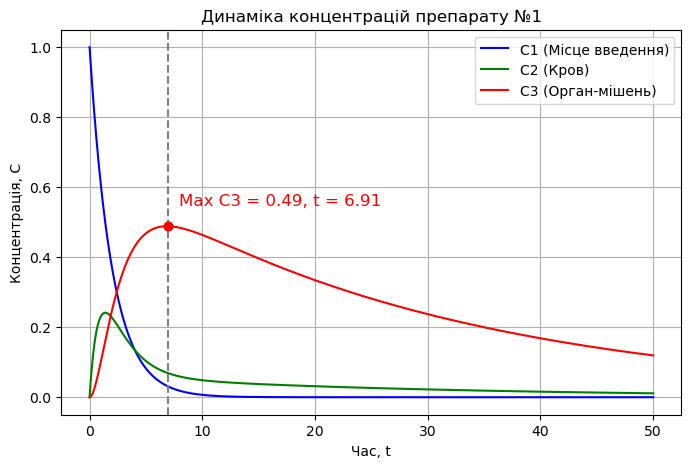

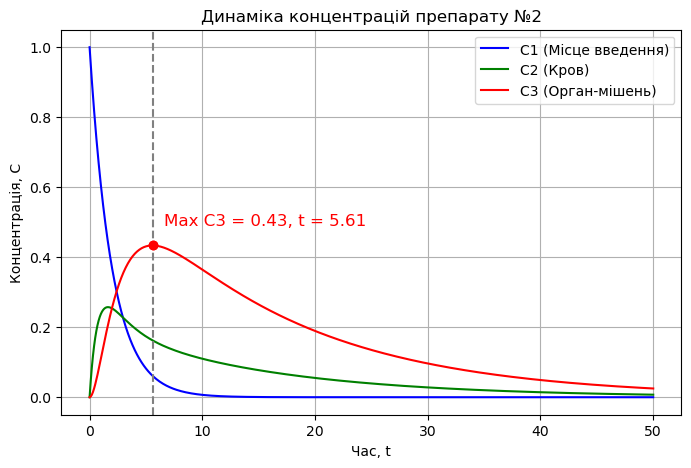

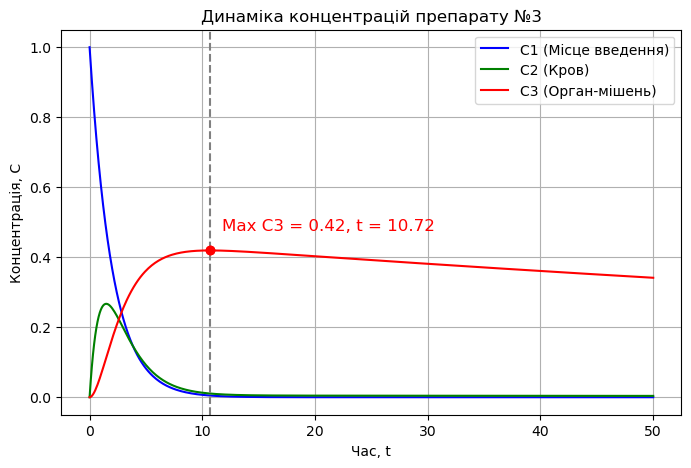

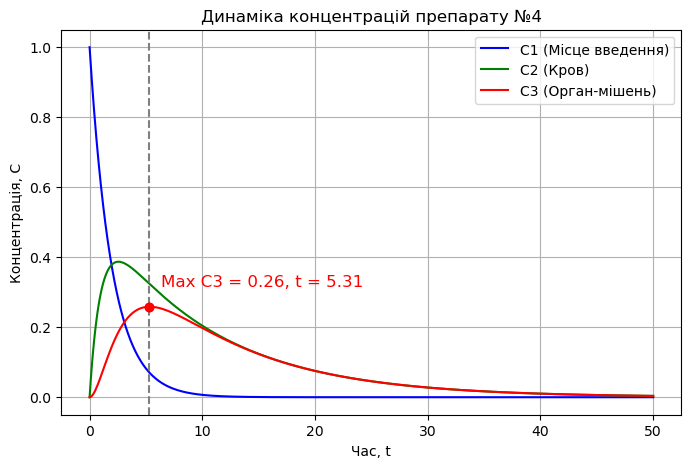

,Set,k1,k23,k32,k4,Max C3,Time Max C3
0,1,0.5,0.7,0.10,0.4,0.488568,6.913828
1,2,0.5,0.8,0.30,0.3,0.433587,5.611222
2,3,0.5,0.4,0.01,0.5,0.419383,10.721443
3,4,0.5,0.4,0.50,0.2,0.258566,5.310621


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

def pharmacokinetics(t, C, k1, k23, k32, k4):
    C1, C2, C3 = C
    dC1 = -k1 * C1
    dC2 = k1 * C1 - k23 * C2 + k32 * C3 - k4 * C2
    dC3 = k23 * C2 - k32 * C3
    return [dC1, dC2, dC3]

def find_max_C3(times, concentrations):
    max_C3 = np.max(concentrations)
    max_C3_time = times[np.argmax(concentrations)]
    return max_C3, max_C3_time

C0 = [1.0, 0.0, 0.0]  
time_span = (0, 50) 
time_points = np.linspace(*time_span, 500) 

constant_sets = [
    {"k1": 0.5, "k23": 0.7, "k32": 0.1, "k4": 0.4},
    {"k1": 0.5, "k23": 0.8, "k32": 0.3, "k4": 0.3},
    {"k1": 0.5, "k23": 0.4, "k32": 0.01, "k4": 0.5},
    {"k1": 0.5, "k23": 0.4, "k32": 0.5, "k4": 0.2},
]

results = []

for i, params in enumerate(constant_sets):
    solution = solve_ivp(
        pharmacokinetics,
        time_span,
        C0,
        t_eval=time_points,
        args=(params["k1"], params["k23"], params["k32"], params["k4"])
    )

    max_C3, max_C3_time = find_max_C3(solution.t, solution.y[2])

    results.append({
        "Set": i + 1,
        "k1": params["k1"],
        "k23": params["k23"],
        "k32": params["k32"],
        "k4": params["k4"],
        "Max C3": max_C3,
        "Time Max C3": max_C3_time,
    })
    
    plt.figure(figsize=(8, 5))
    plt.plot(solution.t, solution.y[0], label="C1 (Місце введення)", color='blue')
    plt.plot(solution.t, solution.y[1], label="C2 (Кров)", color='green')
    plt.plot(solution.t, solution.y[2], label="C3 (Орган-мішень)", color='red')

    plt.scatter(max_C3_time, max_C3, color='red', zorder=5)
    plt.text(max_C3_time + 1, max_C3 + 0.05, f'Max C3 = {max_C3:.2f}, t = {max_C3_time:.2f}', color='red', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

    plt.axvline(max_C3_time, color='gray', linestyle='--')  
    plt.scatter(max_C3_time, max_C3, color='red', zorder=5)  

    plt.title(f"Динаміка концентрацій препарату №{i+1}")
    plt.xlabel("Час, t")
    plt.ylabel("Концентрація, C")
    plt.legend()
    plt.grid()
    plt.show()

results_df = pd.DataFrame(results)
results_df
